# Pycaret

In [1]:
import pandas as pd
train_df = pd.read_csv("../../data/02/2-1/2-1_train_df.csv", index_col=0)
val_df = pd.read_csv("../../data/02/2-1/2-1_val_df.csv", index_col=0)
test_df = pd.read_csv("../../data/02/2-1/2-1_test_df.csv", index_col=0)


train_df = pd.concat([train_df, val_df])
train_df = train_df.drop(["filename"], axis=1)
test_df = test_df.drop(["filename"], axis=1)

In [2]:
import pycaret.classification as cl

clf = cl.setup(
    data=train_df, 
    target='genre', 
    test_data=test_df,
    data_split_stratify=True,
    fold_strategy="stratifiedkfold", 
    fold=10, 
    feature_selection=True,
    feature_selection_threshold=0.15,
    feature_selection_method="boruta",
    use_gpu=True,
    train_size=.9, 
    normalize=True,
)


In [3]:
lgbm = cl.create_model("lightgbm", n_estimators=500)


In [4]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
custom_grid = {
    'num_leaves': sp_randint(6, 50),
    'min_child_samples': sp_randint(10, 50),
    'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    'subsample': sp_uniform(loc=0.2, scale=0.8),
    'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
}


In [5]:
tuned = cl.tune_model(
    lgbm,
    n_iter=100,
    optimize="AUC",
    custom_grid=custom_grid
)


IntProgress(value=0, description='Processing: ', max=7)

\
                                                 
Initiated  . . . . . . . . . . . . . . . . . .   
Status     . . . . . . . . . . . . . . . . . .   
Estimator  . . . . . . . . . . . . . . . . . .   

                                            
                                            
Initiated                         11:30:01  
Status           Searching Hyperparameters  
Estimator  Light Gradient Boosting Machine

Empty DataFrame
Columns: [Accuracy, AUC, Recall, Prec., F1, Kappa, MCC]
Index: []

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.7min


KeyboardInterrupt: 

In [ ]:
cl.evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

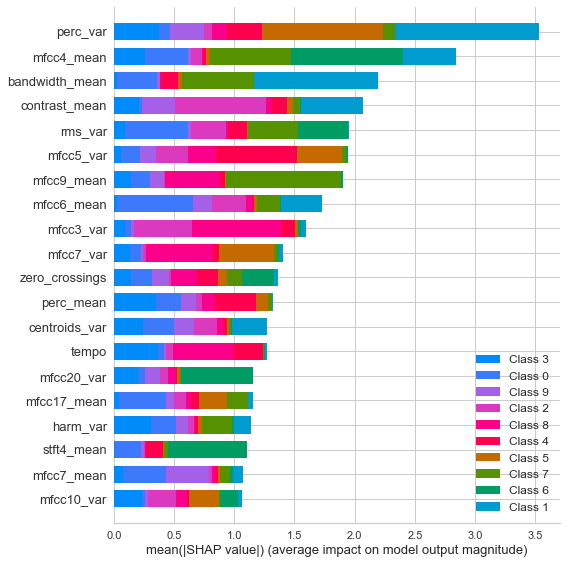

In [ ]:
cl.interpret_model(tuned)

In [ ]:
_ = cl.save_model(tuned, "lgbm")
